# **CNN, XGBoost & Grad-CAM · COVID-19 Detection in Chest X-Ray Images Using Explainable Boosting Algorithms**

This Jupyter notebook presents an explainable hybrid model, merging the strengths of Convolutional Neural Networks (CNNs), eXtreme Gradient Boosting (XGBoost), and Gradient-weighted Class Activation Mapping (Grad-CAM) to detect COVID-19 in chest X-ray images. Notably, the model not only delivers robust performance, with an accuracy of 94.05% and an F1 score of 94.08%, but also imparts transparency into its decision-making process through Grad-CAM visualizations.

## Project Overview

This notebook is an integral part of a dissertation titled "COVID-19 Detection in Chest X-Ray Images Using Explainable Boosting Algorithms". The dissertation addresses the critical need for interpretability and explainability in AI-driven diagnostic models.

A pivotal real-world outcome of this research is "Xray Xplorer", a web application that deploys this model for practical use by healthcare professionals. The application facilitates the detection of COVID-19 by analyzing uploaded chest X-ray images, delivering a diagnostic prediction with a corresponding Grad-CAM visualization.
#### [View Xray Xplorer](https://xrayxplorer.com)

The comprehensive research, methodology, and broader implications underlying this project are detailed in the dissertation report, accessible from the link below.
##### [View Dissertation](https://bit.ly/abhijt-xray-xplorer-report)

The source code for "Xray Xplorer", available on GitHub, provides in-depth insights into the web application's design and functioning.
##### [View Source Code](https://github.com/Abhijeet-Pitumbur/Xray-Xplorer)

## Model Overview

The model integrates the image processing prowess of CNNs, the ensemble learning mechanism of XGBoost, and the interpretability aspect of Grad-CAM, constructing a comprehensive, efficient, and interpretable tool for COVID-19 detection.

- **Convolutional Neural Networks (CNNs)**: Facilitate automatic feature extraction from chest X-ray images.
- **XGBoost**: Enhances the model's performance by merging the outputs of weak learners.
- **Grad-CAM**: Provides visual explanations of model predictions by emphasizing the significant regions in the input images.

All the models built within this notebook can be accessed directly from Google Drive. This includes the individual CNN models, as well as the hybrid CNN-XGBoost models used for the final diagnosis.
##### [View Model Files](https://bit.ly/abhijt-xray-xplorer-models)

## Dataset Overview

This project leverages the "COVID-QU-Ex Dataset" (Coronavirus Disease Qatar University Extended Dataset) from Kaggle, which encompasses 33,900 chest X-ray images, categorized as COVID-19 positive cases, normal cases, and non-COVID infection cases.

- 11,950 images are classified as COVID-19 positive cases,
- 10,695 images are classified as normal cases,
- 11,255 images are classified as positive cases for non-COVID infections.

The images are organized into training (21,705 images), validation (5,410 images), and testing (6,785 images) sets for effective model training and evaluation.
##### [View Dataset](https://doi.org/10.34740/KAGGLE/DSV/3122958)

## Workflow Overview

1. **Data Preprocessing**: Normalizes and standardizes input images to enhance model learning.
2. **Data Augmentation**: Enlarges the training set through techniques like rotation, flipping, brightness variation, and zooming to boost model's generalization ability.
3. **Dataset Preparation**: Uses ImageDataGenerator instances to divide and stream data during model training, validation, and testing.
4. **CNN Model Implementation**: Adapts pre-trained CNN models (VGG16, ResNet50, InceptionV3) for feature extraction and serves these features as input to the XGBoost model for classification.
5. **XGBoost Hyperparameter Tuning and Feature Selection**: Applies Bayesian optimization with cross-validation for optimal hyperparameter selection, concurrently performing feature selection to hone in on the most predictive features.
6. **CNN-XGBoost Hybrid Model Evaluation and Testing**: Evaluates the performance of the hybrid model using metrics like accuracy, precision, recall, F1 score, specificity, and AUC-ROC.
7. **Grad-CAM Implementation**: Offers insights into the decision-making process of the CNN model through heatmap visualizations.
8. **Chest X-Ray Image Verification**: Uses a specially-trained VGG16 model to ensure that the uploaded image is a chest X-ray before proceeding with the COVID-19 detection pipeline, thereby mitigating errors from incorrect image uploads.

<sub>Model building is an iterative process, and adjustments may be needed based on the results. The goal is to build a high-performing and explainable model for COVID-19 detection.</sub>

**Abhijeet Pitumbur © 2023**

## Preliminaries

In [ ]:
''' Cell 1: Download and Extract Dataset '''

# Import necessary library
import os

# Define name of dataset to download
dataset_name = 'COVID-QU-Ex-Dataset'

# Define Google Drive link to download dataset
download_link = 'https://drive.google.com/uc?id=1W8TS9dynVzy4VJkVMxoddx5Ofdl8nins'

# Define path to save downloaded zip file
zip_file_path = f'{dataset_name}.zip'

# Define paths for training, validation, and testing sets
train_dir = f'{dataset_name}/Training'
val_dir = f'{dataset_name}/Validation'
test_dir = f'{dataset_name}/Testing'

# Download dataset zip file and unzip it
os.system(f'gdown -q {download_link} -O {zip_file_path}')
os.system(f'unzip -q -n {zip_file_path}')

# Verify successful download and extraction of dataset
if os.path.exists(zip_file_path) and os.path.isdir(dataset_name):
    print('\n\033[1m\033[32m' + f'Download and unzip of {dataset_name} successful' + '\033[0m\n')
else:
    print('\n\033[1m\033[31m' + f'Download and unzip of {dataset_name} failed' + '\033[0m\n')
    raise Exception(f'Download and unzip of {dataset_name} failed')


Download and unzip of COVID-QU-Ex-Dataset successful



In [ ]:
''' Cell 2: Display Software Specifications '''

# Import necessary libraries
import platform
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
import cv2
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import seaborn as sns

# Define software libraries and versions
software_specs = [
    ['Python', platform.python_version()],
    ['TensorFlow', tf.__version__],
    ['Keras', keras.__version__],
    ['XGBoost', xgb.__version__],
    ['OpenCV', cv2.__version__],
    ['NumPy', np.__version__],
    ['Scikit-Learn', sklearn.__version__],
    ['Matplotlib', matplotlib.__version__],
    ['Pandas', pd.__version__],
    ['Seaborn', sns.__version__]
]

# Convert software specifications into DataFrame
df_software = pd.DataFrame(software_specs)

# Display software specifications DataFrame
print('\n\033[1m\033[36m' + 'Software Specifications' + '\033[0m\n')
display(df_software.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))
print()


Software Specifications



In [ ]:
''' Cell 3: Display Hardware Specifications '''

# Import necessary library
import subprocess

# Define several helper functions to convert and clean extracted hardware specifications
def run_command(cmd):
    return subprocess.run(cmd, stdout=subprocess.PIPE, shell=True).stdout.decode('utf-8').strip()
def mhz_to_ghz(mhz_string):
    mhz_value = float(mhz_string.replace('MHz', ''))
    return f'{mhz_value / 1000:.3g} GHz'
def k_to_mb(k_string):
    k_value = float(k_string.replace('K', '').replace('MiB', '').strip())
    return f'{k_value:.3g} MB'
def kb_to_gb(kb_string):
    kb_value = float(kb_string.replace('kB', ''))
    return f'{kb_value / 1024**2:.3g} GB'

# Extract and convert relevant hardware specifications
cpu_specs = [
    ['CPU Model', run_command('lscpu | grep "Model name"').split(':')[-1].strip()],
    ['Sockets', run_command('lscpu | grep "Socket(s):"').split(':')[-1].strip()],
    ['Cores per Socket', run_command('lscpu | grep "Core(s) per socket"').split(':')[-1].strip()],
    ['Threads per Core', run_command('lscpu | grep "Thread(s) per core"').split(':')[-1].strip()],
    ['Clock Speed', mhz_to_ghz(run_command('lscpu | grep MHz').split(':')[-1].strip())],
    ['L3 Cache', k_to_mb(run_command('lscpu | grep "L3 cache"').split(':')[-1].strip())]
]
gpu_info = run_command('nvidia-smi -L')
gpu_model = gpu_info.split(':')[1].split(' (')[0] if gpu_info else 'No GPU detected'
gpu_specs = [['GPU Model', gpu_model]]
ram_specs = [['Total System RAM', kb_to_gb(run_command('free | grep Mem | awk \'{print $2}\''))]]
storage_specs = [['Total Disk Space', run_command('df -BG / | awk \'NR==2 {print $2}\'').replace('G', ' GB')]]

# Combine all specifications and convert into DataFrame
hardware_specs = cpu_specs + gpu_specs + ram_specs + storage_specs
df_hardware = pd.DataFrame(hardware_specs)

# Display hardware specifications DataFrame
print('\n\033[1m\033[36m' + 'Hardware Specifications' + '\033[0m\n')
display(df_hardware.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))
print()


Hardware Specifications



## Data Preprocessing

In [ ]:
''' Cell 4: Define Image Preprocessing Function '''

# Define function to preprocess input images
def preprocess_image(image):
    try:
        image = cv2.resize(image, (256, 256))  # Resize image to standard size of 256x256 pixels
        image = image / 255.0  # Normalize pixel values to range [0, 1] for optimal deep learning performance
        return image
    except Exception as e:
        raise Exception('Preprocessing error')

## Data Augmentation

In [ ]:
''' Cell 5: Set Up Image Data Generators with Data Augmentation '''

# Import necessary library
from keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation techniques for training data to increase diversity of training samples and improve model robustness
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # Apply preprocessing function to every image
    rotation_range=10,  # Rotate images up to 10 degrees randomly
    width_shift_range=0.05,  # Shift images horizontally by up to 5% of width randomly
    height_shift_range=0.05,  # Shift images vertically by up to 5% of height randomly
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly change brightness
    zoom_range=[0.8, 1.2]  # Randomly zoom in on images
)

# Create ImageDataGenerator instances for training, validation, and testing sets
train_datagen = data_generator

# Do not apply augmentation to validation and testing sets, only preprocessing
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

## Dataset Preparation

In [ ]:
''' Cell 6: Generate Image Batches and Display Dataset Distribution '''

# Import necessary library
import sys

# Set batch size for data generators
batch_size = 32

# Temporarily redirect standard output to null to suppress verbose output
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Generate batches of tensor image data with real-time data augmentation for training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of tensor image data with real-time data augmentation for validation set
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of tensor image data with real-time data augmentation for testing set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Restore standard output to original state
sys.stdout = original_stdout

# Store class indices and class names
classes = train_generator.class_indices
class_names = list(classes.keys())

# Calculate class distribution for each set
train_distribution = np.bincount(train_generator.labels)
val_distribution = np.bincount(val_generator.labels)
test_distribution = np.bincount(test_generator.labels)

# Prepare data for DataFrame representation of class distribution
class_data = [['Class', 'Index', 'Training', 'Validation', 'Testing']]
class_data += list(zip(
    class_names,
    list(classes.values()),
    list(train_distribution),
    list(val_distribution),
    list(test_distribution)
))

# Create DataFrame to represent class distribution
df_class = pd.DataFrame(class_data)

# Display class distribution DataFrame
print('\n\033[1m\033[36m' + 'Dataset Distribution Per Class' + '\033[0m\n')
display(df_class.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))

# Calculate sum of images in each set
subtotals = [np.sum(train_distribution), np.sum(val_distribution), np.sum(test_distribution)]
total = np.sum(subtotals)

# Prepare data for DataFrame representation of set totals
set_data = [['Set', 'Count']]
set_data += list(zip(['Training', 'Validation', 'Testing', 'Total'], subtotals + [total]))

# Create DataFrame to represent set totals
df_set = pd.DataFrame(set_data)

# Display set totals DataFrame
print('\n\033[1m\033[36m' + 'Total Images Per Set' + '\033[0m\n')
display(df_set.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))
print()


Dataset Distribution Per Class




Total Images Per Set



## CNN Model Implementation

In [ ]:
''' Cell 7: Define Function to Create Custom CNN Models '''

# Import necessary libraries
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Define function to create CNN model with pre-trained base CNN model
def create_cnn_model(base_cnn_model):

    # Freeze layers of base CNN model
    for layer in base_cnn_model.layers:
        layer.trainable = False

    # Add custom layers to base CNN model
    x = base_cnn_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(len(classes), activation='softmax')(x)

    # Define final CNN model
    cnn_model = Model(inputs=base_cnn_model.input, outputs=x)

    return cnn_model

In [ ]:
''' Cell 8: Load Pre-trained Base CNN Models '''

# Import necessary libraries
from keras.applications import VGG16, ResNet50, InceptionV3

# Temporarily redirect standard output to null to suppress verbose output
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Load pre-trained base CNN models (VGG16, ResNet50, InceptionV3) with pre-trained weights from ImageNet without top fully-connected layers
vgg16 = VGG16(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)
inceptionv3 = InceptionV3(weights='imagenet', include_top=False)

# Restore standard output to original state
sys.stdout = original_stdout

# Define dictionary of CNN models for easy access
cnn_models = {
    'VGG16': vgg16,
    'ResNet50': resnet50,
    'InceptionV3': inceptionv3
}


Training VGG16 CNN Model...



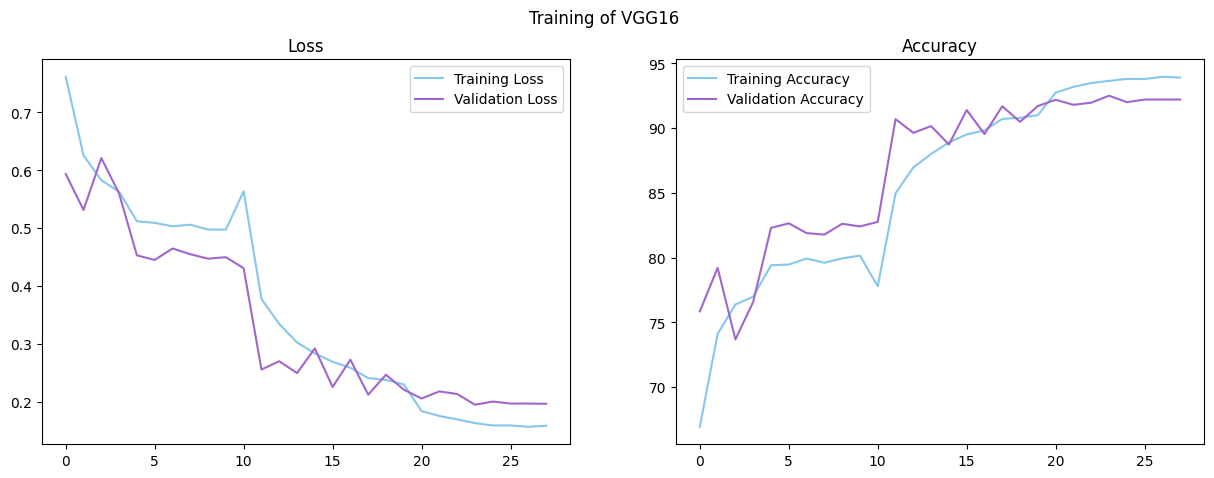


Training ResNet50 CNN Model...



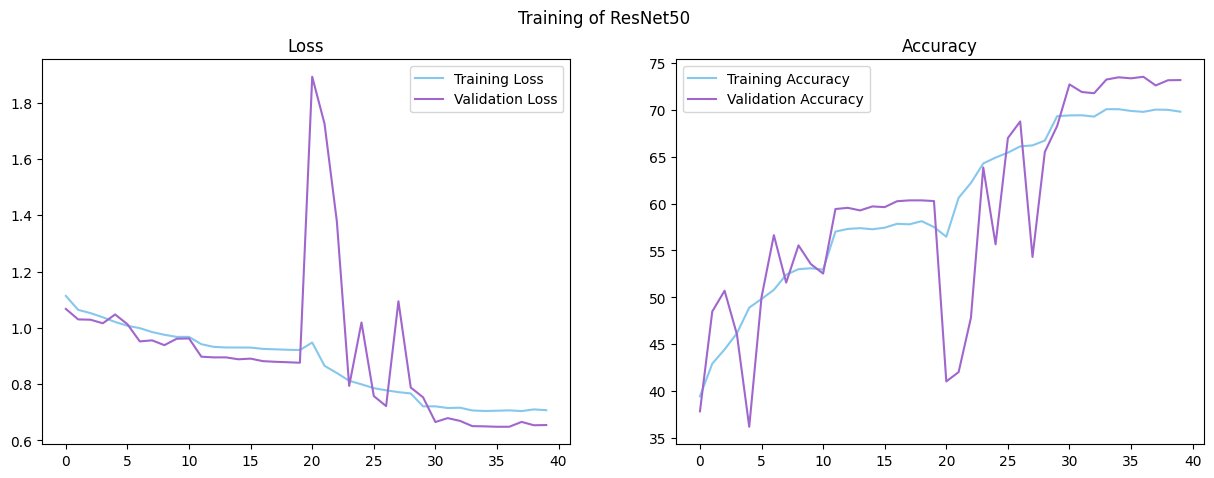


Training InceptionV3 CNN Model...



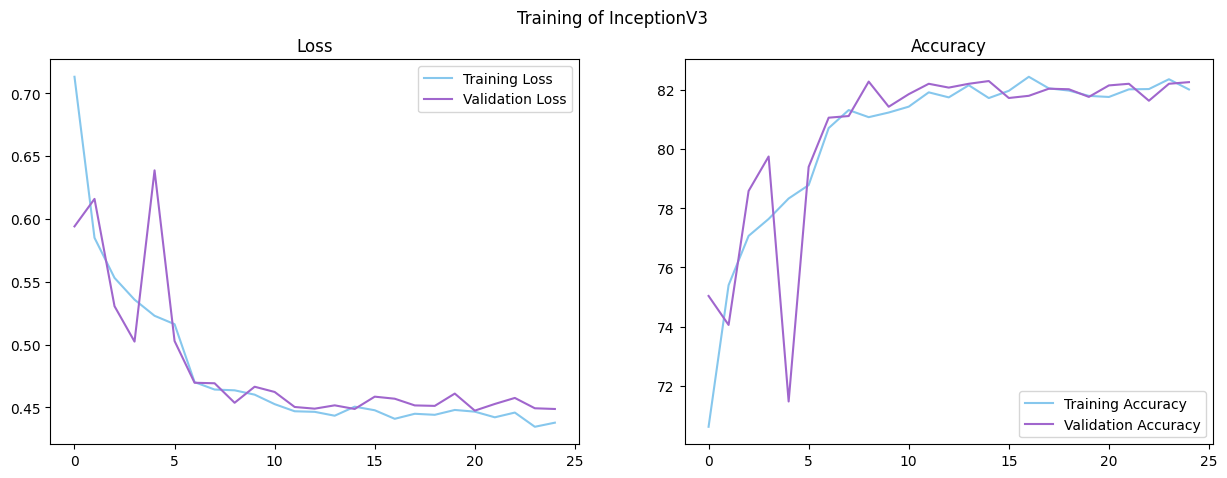


Training Results Per CNN Model



In [ ]:
''' Cell 9: Compile, Train, and Evaluate CNN Models '''

# Import necessary libraries
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define list to hold results of each trained CNN model
cnn_results = []

# Prepare headers for DataFrame representation
df_headers = ['CNN Model', 'Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy']
cnn_results.append(df_headers)

# Compile and fit CNN models
for cnn_model_name, base_cnn_model in cnn_models.items():

    # Create new figure with two subplots for each CNN model
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Give figure title
    fig.suptitle(f'Training of {cnn_model_name}')

    # Create and compile CNN model
    cnn_model = create_cnn_model(base_cnn_model)
    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Calculate steps per epoch and validation steps
    train_steps = train_generator.samples // train_generator.batch_size
    val_steps = val_generator.samples // val_generator.batch_size

    # Set up callbacks
    model_checkpoint = ModelCheckpoint(f'{cnn_model_name}-Best-Weights.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
    early_stopping = EarlyStopping(monitor='val_loss', patience=4)

    # Fit CNN model to data
    print('\n\033[1m\033[36m' + f'Training {cnn_model_name} CNN Model...' + '\033[0m\n')
    stage_1 = cnn_model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=20,
        validation_data=val_generator,
        validation_steps=val_steps,
        callbacks=[model_checkpoint, reduce_lr, early_stopping],
        verbose=0
    )

    # Unfreeze last 4 layers of base CNN model and compile model with lower learning rate
    for layer in base_cnn_model.layers[-4:]:
        layer.trainable = True
    cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Continue training CNN model
    stage_2 = cnn_model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=20,
        validation_data=val_generator,
        validation_steps=val_steps,
        callbacks=[model_checkpoint, reduce_lr, early_stopping],
        verbose=0
    )

    # Plot training and validation losses
    axs[0].plot(stage_1.history['loss'] + stage_2.history['loss'], label='Training Loss', color='#86C7ED')
    axs[0].plot(stage_1.history['val_loss'] + stage_2.history['val_loss'], label='Validation Loss', color='#A066CD')
    axs[0].legend()
    axs[0].set_title('Loss')

    # Plot training and validation accuracies
    axs[1].plot(
        [100 * i for i in stage_1.history['accuracy'] + stage_2.history['accuracy']],
        label='Training Accuracy',
        color='#86C7ED'
    )
    axs[1].plot(
        [100 * i for i in stage_1.history['val_accuracy'] + stage_2.history['val_accuracy']],
        label='Validation Accuracy',
        color='#A066CD'
    )
    axs[1].legend()
    axs[1].set_title('Accuracy')

    # Display figure and subplots
    plt.show()

    # Temporarily redirect standard output to null to suppress verbose output
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    # Load best weights
    cnn_model.load_weights(f'{cnn_model_name}-Best-Weights.h5')

    # Save CNN model with best weights in H5 format
    cnn_model.save(f'{cnn_model_name}-Model.h5')

    # Save CNN model with best weights in TensorFlow SavedModel format
    cnn_model.save(f'{cnn_model_name}-Full-Model', save_format='tf')
    os.system(f'zip -q -r {cnn_model_name}-Full-Model.zip {cnn_model_name}-Full-Model')

    # Update models dictionary with trained CNN model
    cnn_models[cnn_model_name] = cnn_model

    # Restore standard output to original state
    sys.stdout = original_stdout

    # Append final metrics to results list
    cnn_results.append([
        cnn_model_name,
        f'{stage_2.history["loss"][-1]:.4f}',
        f'{stage_2.history["accuracy"][-1] * 100:.2f}%',
        f'{stage_2.history["val_loss"][-1]:.2f}',
        f'{stage_2.history["val_accuracy"][-1] * 100:.4f}%'
    ])

# Convert results list to DataFrame
df_results = pd.DataFrame(cnn_results)

# Display results DataFrame
print('\n\033[1m\033[36m' + 'Training Results Per CNN Model' + '\033[0m\n')
display(df_results.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))
print()

## XGBoost Hyperparameter Tuning and Feature Selection

In [ ]:
# Note: Install latest version of Scikit-Optimize (skopt) Python library, if not already installed

! pip install -q -U scikit-optimize

In [ ]:
''' Cell 10: Define XGBoost Hyperparameter Tuning Function with Feature Selection '''

# Import necessary libraries
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.feature_selection import SelectFromModel

# Define function to tune hyperparameters of XGBoost model using Bayesian optimization and select important features
def tune_hyperparameters_and_select_features(train_features, train_labels):

    # Define search space for hyperparameters
    search_space = {
        'learning_rate': Real(0.001, 0.5, 'uniform'),  # Control learning speed of model
        'max_depth': Integer(3, 15),  # Determine maximum depth of tree
        'n_estimators': Integer(50, 500),  # Specify number of trees in ensemble
        'min_child_weight': Integer(1, 10),  # Control minimum sum of weights needed in child
        'gamma': Real(0, 1, 'uniform'),  # Specify minimum loss reduction required to make split
        'subsample': Real(0.1, 1.0, 'uniform'),  # Specify fraction of observations to be randomly sampled for each tree
        'colsample_bytree': Real(0.1, 1.0, 'uniform'),  # Specify fraction of columns to be randomly sampled for each tree
        'alpha': Real(0.0, 1.0),  # Control L1 regularization term on weights
        'lambda': Real(0.0, 1.0)  # Control L2 regularization term on weights
    }

    # Initialize XGBoost classifier with multi-class softmax objective, and preset random state for reproducibility
    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'
    )

    # Perform Bayesian optimization using cross-validation and F1 score as scoring metric
    bayes_search = BayesSearchCV(
        xgb_model,
        search_space,
        cv=5,
        scoring='f1_macro',
        n_jobs=-1,
        n_iter=100
    )
    bayes_search.fit(train_features, train_labels)

    # Get best hyperparameters from Bayesian optimization
    best_params = bayes_search.best_params_

    # Initialize new XGBoost model with best hyperparameters
    new_xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss',
        **best_params
    )

    # Fit XGBoost model with best hyperparameters to training data
    new_xgb_model.fit(train_features, train_labels)

    # Create selector object to select features with importance greater than specified threshold
    selector = SelectFromModel(new_xgb_model, threshold=0.1, prefit=True)

    # Transform training features by selecting only important features
    selected_train_features = selector.transform(train_features)

    return best_params, selected_train_features, selector

In [ ]:
''' Cell 11: Define Model Evaluation Function '''

# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Define function to evaluate performance of given model
def evaluate_model(model, x, y, model_name, classes):

    # Predict labels for given data using provided model
    y_pred = model.predict(x)

    # Compute accuracy, F1 score, precision, recall for predictions
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')

    # Compute specificity for predictions
    cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    specificity = np.mean(TN / (TN + FP))

    # Compute AUC-ROC for predictions
    y_bin = label_binarize(y, classes=[*range(len(classes))])
    y_pred_bin = label_binarize(y_pred, classes=[*range(len(classes))])
    auc_roc = roc_auc_score(y_bin, y_pred_bin, average='macro', multi_class='ovr')

    # Prepare data for DataFrame representation of performance metrics
    performance_data = [
        ['Accuracy', f'{accuracy:.2%}'],
        ['Precision', f'{precision:.2%}'],
        ['Recall', f'{recall:.2%}'],
        ['F1 Score', f'{f1:.2%}'],
        ['Specificity', f'{specificity:.2%}'],
        ['AUC-ROC', f'{auc_roc:.2%}']
    ]

    # Create DataFrame to represent performance metrics
    df_performance = pd.DataFrame(performance_data)

    # Display performance metrics DataFrame
    print('\n\033[1m\033[36m' + f'Performance Metrics of {model_name}' + '\033[0m\n')
    display(df_performance.style.hide(axis='index').hide(axis='columns').set_properties(**{'text-align': 'left'}))

    return accuracy, precision, recall, f1, specificity, auc_roc


Tuning Hyperparameters and Selecting Features for VGG16-XGBoost Hybrid Model...

Training VGG16-XGBoost Hybrid Model...



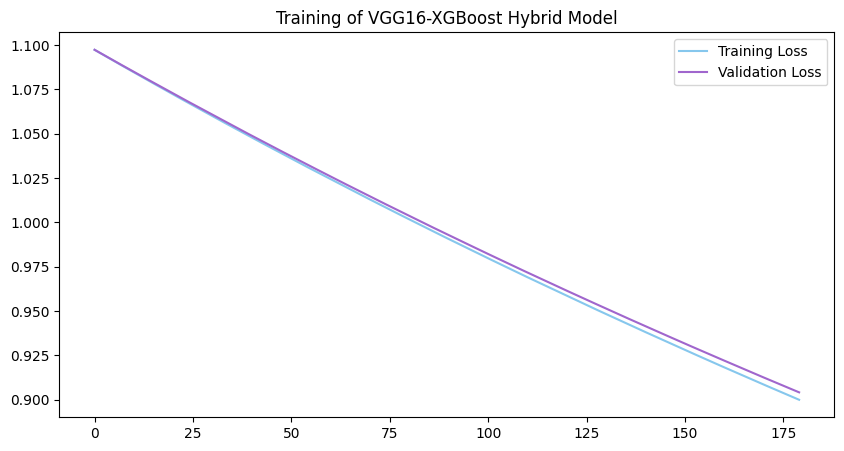


Performance Metrics of VGG16-XGBoost Hybrid Model




Tuning Hyperparameters and Selecting Features for ResNet50-XGBoost Hybrid Model...

Training ResNet50-XGBoost Hybrid Model...



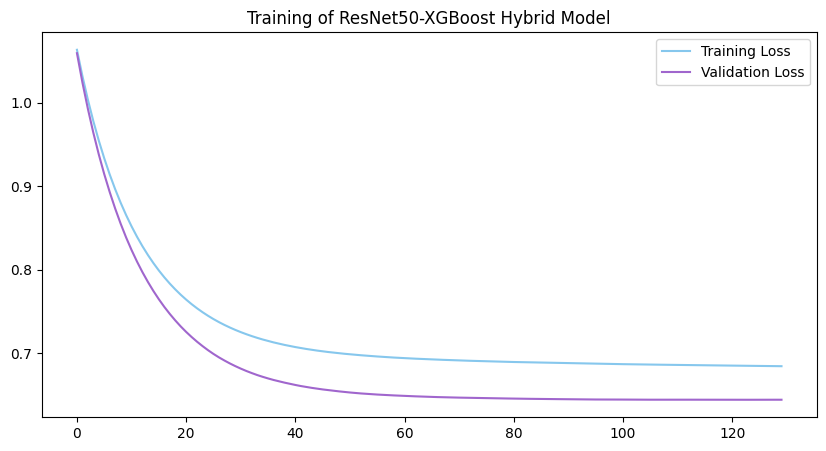


Performance Metrics of ResNet50-XGBoost Hybrid Model




Tuning Hyperparameters and Selecting Features for InceptionV3-XGBoost Hybrid Model...

Training InceptionV3-XGBoost Hybrid Model...



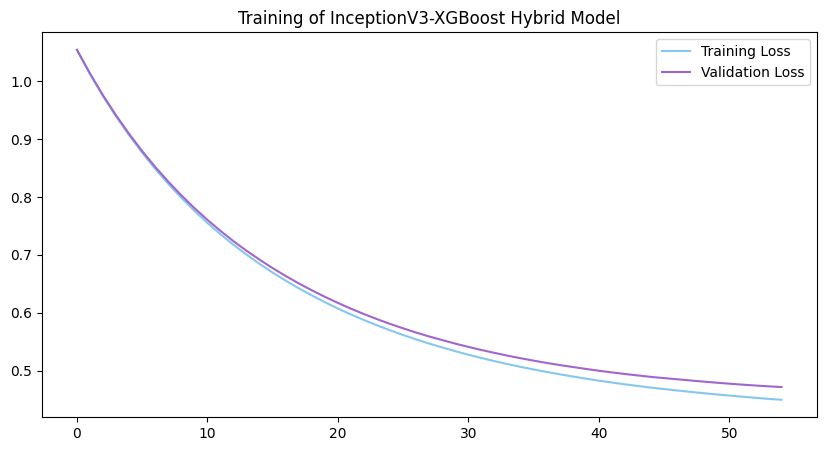


Performance Metrics of InceptionV3-XGBoost Hybrid Model




The best performing model is the VGG16-XGBoost hybrid model, achieving an F1 score of 92.07%



In [ ]:
''' Cell 12: Extract Features with CNN, Classify Images with XGBoost and Evaluate Hybrid Models '''

# Define dictionaries to store features and labels for each model for both training and validation sets
train_features_dict = {}
val_features_dict = {}
train_labels_dict = {}
val_labels_dict = {}

# Initialize dictionaries with empty lists for each trained CNN model
for cnn_model_name in cnn_models.keys():
    train_features_dict[cnn_model_name] = []
    val_features_dict[cnn_model_name] = []
    train_labels_dict[cnn_model_name] = []
    val_labels_dict[cnn_model_name] = []

# Calculate steps per epoch and validation steps
train_steps = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

# Extract features and labels using trained CNN models
for cnn_model_name, cnn_model in cnn_models.items():

    # Temporarily redirect standard output to null to suppress verbose output
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    # Extract features for each batch of images in training set
    for _ in range(train_steps):
        train_images, train_labels = next(train_generator)
        batch_features = cnn_model.predict(train_images)
        train_features_dict[cnn_model_name].extend(batch_features)
        train_labels_dict[cnn_model_name].extend(np.argmax(train_labels, axis=1))

    # Extract features for each batch of images in validation set
    for _ in range(val_steps):
        val_images, val_labels = next(val_generator)
        batch_features = cnn_model.predict(val_images)
        val_features_dict[cnn_model_name].extend(batch_features)
        val_labels_dict[cnn_model_name].extend(np.argmax(val_labels, axis=1))

    # Restore standard output to original state
    sys.stdout = original_stdout

    # Store features and labels in corresponding dictionaries
    train_features_dict[cnn_model_name] = np.array(train_features_dict[cnn_model_name])
    val_features_dict[cnn_model_name] = np.array(val_features_dict[cnn_model_name])
    train_labels_dict[cnn_model_name] = np.array(train_labels_dict[cnn_model_name])
    val_labels_dict[cnn_model_name] = np.array(val_labels_dict[cnn_model_name])

# Initialize variables to store best F1 score and corresponding model
best_f1 = 0
best_hybrid_model = None
best_cnn_model = None
best_cnn_model_name = ''

# Find best hybrid model
for cnn_model_name, cnn_model in cnn_models.items():

    # Tune hyperparameters of XGBoost model using training features and select important features
    print('\n\033[1m\033[36m' + f'Tuning Hyperparameters and Selecting Features for {cnn_model_name}-XGBoost Hybrid Model...' + '\033[0m')
    xgb_params, selected_train_features, selector = tune_hyperparameters_and_select_features(
        train_features_dict[cnn_model_name],
        train_labels_dict[cnn_model_name]
    )

    # Select important features from validation set using same selector
    selected_val_features = selector.transform(val_features_dict[cnn_model_name])

    # Create evaluation set comprising of selected training and validation features
    eval_set = [(selected_train_features, train_labels_dict[cnn_model_name]), (selected_val_features, val_labels_dict[cnn_model_name])]

    # Initialize XGBoost classifier with multi-class softmax objective, and preset random state for reproducibility
    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss',
        early_stopping_rounds=10,
        **xgb_params
    )

    # Create evaluation set comprising of training and validation sets
    eval_set = [(train_features_dict[cnn_model_name], train_labels_dict[cnn_model_name]), (val_features_dict[cnn_model_name], val_labels_dict[cnn_model_name])]

    # Train XGBoost model using extracted features and tuned hyperparameters
    print('\n\033[1m\033[36m' + f'Training {cnn_model_name}-XGBoost Hybrid Model...' + '\033[0m\n')
    xgb_model.fit(
        selected_train_features,
        train_labels_dict[cnn_model_name],
        eval_set=eval_set,
        verbose=False
    )

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.title(f'Training of {cnn_model_name}-XGBoost Hybrid Model')
    plt.plot(xgb_model.evals_result()['validation_0']['mlogloss'], label='Training Loss', color='#86C7ED')
    plt.plot(xgb_model.evals_result()['validation_1']['mlogloss'], label='Validation Loss', color='#A066CD')
    plt.legend()

    # Display plot
    plt.show()

    # Evaluate hybrid model
    accuracy, precision, recall, f1, specificity, auc_roc = evaluate_model(
        xgb_model,
        selected_val_features,
        val_labels_dict[cnn_model_name],
        f'{cnn_model_name}-XGBoost Hybrid Model',
        classes
    )

    # Update best performing model and score if current model performed better
    if f1 > best_f1:
        best_f1 = f1
        best_hybrid_model = xgb_model
        best_cnn_model = cnn_model
        best_cnn_model_name = cnn_model_name

print('\n\033[1m\033[32m' + f'The best performing model is the {best_cnn_model_name}-XGBoost hybrid model, achieving an F1 score of {best_f1:.2%}' + '\033[0m\n')

## CNN-XGBoost Hybrid Model Evaluation and Testing

In [ ]:
''' Cell 13: Define Function for Plotting Confusion Matrix '''

# Import necessary library
from sklearn.metrics import confusion_matrix

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, classes):

    # Compute confusion matrix from true and predicted labels
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentage matrix
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)

    # Add number of images and percentage to annotations
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i][0]
                annot[i, j] = f'{p:.2f}%\n({c} of {s})'
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = f'{p:.2f}%\n({c})'

    # Create new figure for confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display confusion matrix as heatmap
    sns.heatmap(cm, annot=annot, fmt='', square=True, cbar=False, cmap=plt.cm.Blues, ax=ax)

    # Set labels for x and y axes
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')

    # Set title for plot
    ax.set_title(f'Confusion Matrix of {model_name}')

    # Extract class names and sort by index
    class_names = [k for k, v in sorted(classes.items(), key=lambda item: item[1])]

    # Set class names as tick labels for x and y axes
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.tick_params(axis='x', colors='#999999')
    ax.tick_params(axis='y', colors='#999999')

    # Display plot
    print()
    plt.show()

In [ ]:
''' Cell 14: Retrieve Features and Labels for Best CNN Model '''

# Retrieve features for training and validation sets corresponding to best performing CNN model
train_features = train_features_dict[best_cnn_model_name]
val_features = val_features_dict[best_cnn_model_name]

# Retrieve corresponding labels for best performing CNN model
train_labels_xgb = train_labels_dict[best_cnn_model_name]
val_labels_xgb = val_labels_dict[best_cnn_model_name]

In [ ]:
''' Cell 15: Tune Hyperparameters and Select Features for Final Hybrid Model '''

# Perform hyperparameter tuning and feature selection on hybrid model using features extracted by best performing CNN model
print('\n\033[1m\033[36m' + f'Tuning Hyperparameters and Selecting Features for Final {best_cnn_model_name}-XGBoost Model...' + '\033[0m\n')
xgb_params, selected_train_features, selector = tune_hyperparameters_and_select_features(
    train_features,
    train_labels_xgb
)

# Select important features from validation set using same selector
selected_val_features = selector.transform(val_features)


Tuning Hyperparameters and Selecting Features for Final VGG16-XGBoost Model...




Training Final VGG16-XGBoost Model...



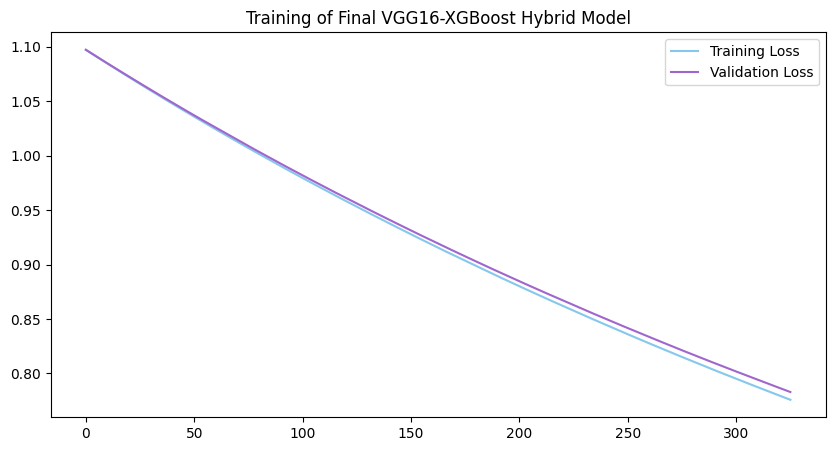

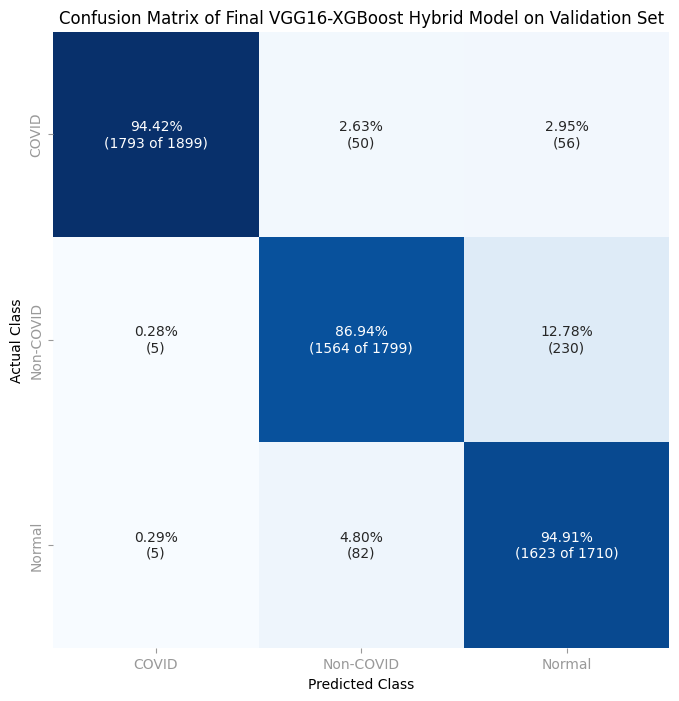


Performance Metrics of Final VGG16-XGBoost Hybrid Model on Validation Set



In [ ]:
''' Cell 16: Train and Evaluate Final Hybrid Model '''

# Initialize XGBoost classifier with multi-class softmax objective, and preset random state for reproducibility
final_hybrid_model = xgb.XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss',
    early_stopping_rounds=10,
    **xgb_params
)

# Create evaluation set comprising of selected training and validation features
eval_set = [(selected_train_features, train_labels_xgb), (selected_val_features, val_labels_xgb)]

# Train final hybrid model with optimal hyperparameters obtained from tuning process
print('\n\033[1m\033[36m' + f'Training Final {best_cnn_model_name}-XGBoost Model...' + '\033[0m\n')
final_hybrid_model.fit(
    selected_train_features,
    train_labels_xgb,
    eval_set=eval_set,
    verbose=False
)

# Create new figure for final model
plt.figure(figsize=(10, 5))
plt.title(f'Training of Final {best_cnn_model_name}-XGBoost Hybrid Model')

# Plot training and validation losses
plt.plot(final_hybrid_model.evals_result()['validation_0']['mlogloss'], label='Training Loss', color='#86C7ED')
plt.plot(final_hybrid_model.evals_result()['validation_1']['mlogloss'], label='Validation Loss', color='#A066CD')
plt.legend()

# Display plot
plt.show()

# Compute and plot confusion matrix
predictions = final_hybrid_model.predict(selected_val_features)
plot_confusion_matrix(
    val_labels_xgb,
    predictions,
    f'Final {best_cnn_model_name}-XGBoost Hybrid Model on Validation Set',
    classes
)

# Evaluate performance of final hybrid model on validation set
accuracy, precision, recall, f1, specificity, auc_roc = evaluate_model(
    final_hybrid_model,
    selected_val_features,
    val_labels_xgb,
    f'Final {best_cnn_model_name}-XGBoost Hybrid Model on Validation Set', classes
)
print()

In [ ]:
''' Cell 17: Save and Download Trained Models '''

# Import necessary libraries
import pickle
from google.colab import files

# Download saved best performing CNN models from Google Colab to local system
files.download(f'{best_cnn_model_name}-Model.h5')
files.download(f'{best_cnn_model_name}-Full-Model.zip')

# Save best performing hybrid model and final hybrid model
with open(f'{best_cnn_model_name}-XGBoost-Hybrid-Model.pkl', 'wb') as f:
    pickle.dump(best_hybrid_model, f)
with open(f'{best_cnn_model_name}-XGBoost-Final-Tuned-Hybrid-Model.pkl', 'wb') as f:
    pickle.dump(final_hybrid_model, f)

# Download saved hybrid models from Google Colab to local system
files.download(f'{best_cnn_model_name}-XGBoost-Hybrid-Model.pkl')
files.download(f'{best_cnn_model_name}-XGBoost-Final-Tuned-Hybrid-Model.pkl')

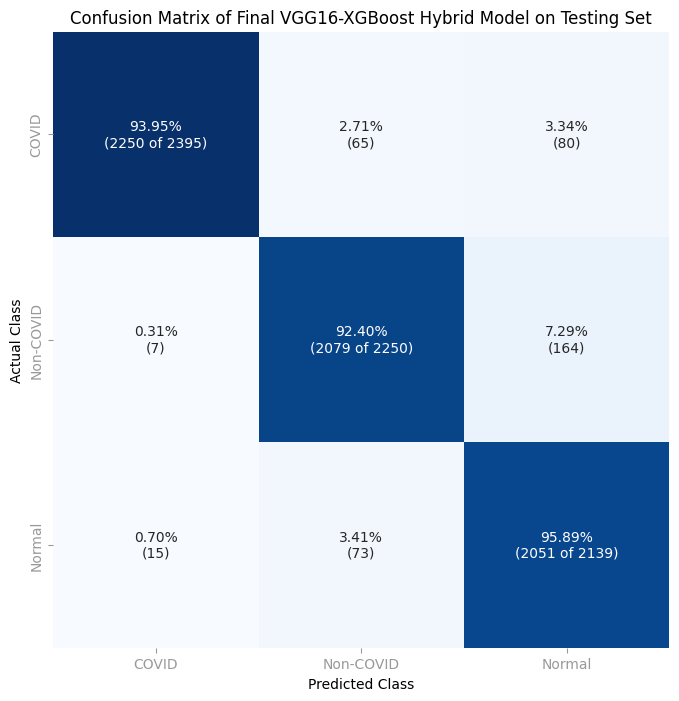


Performance Metrics of Final VGG16-XGBoost Hybrid Model on Testing Set



In [ ]:
''' Cell 18: Load Test Data, Extract Features, and Evaluate Final Model '''

# Calculate test steps
test_steps = test_generator.samples // test_generator.batch_size

# Initialize lists to store test images, features and labels
test_images = []
test_features_xgb = []
test_labels_xgb = []

# Temporarily redirect standard output to null to suppress verbose output
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Extract features from test images and load labels using best performing CNN model
for _ in range(test_steps):
    test_batch_images, test_batch_labels = next(test_generator)
    test_batch_features = best_cnn_model.predict(test_batch_images)
    test_images.extend(test_batch_images)
    test_features_xgb.extend(test_batch_features)
    test_labels_xgb.extend(np.argmax(test_batch_labels, axis=1))

# Restore standard output to original state
sys.stdout = original_stdout

# Convert features, labels and images lists to arrays
test_images = np.array(test_images)
test_features_xgb = np.array(test_features_xgb)
test_labels_xgb = np.array(test_labels_xgb)

# Apply same feature selection process to test data
selected_test_features = selector.transform(test_features_xgb)

# Compute and plot confusion matrix
predictions = final_hybrid_model.predict(selected_test_features)
plot_confusion_matrix(
    test_labels_xgb,
    predictions,
    f'Final {best_cnn_model_name}-XGBoost Hybrid Model on Testing Set',
    classes
)

# Evaluate performance of final hybrid model on testing set
accuracy, precision, recall, f1, specificity, auc_roc = evaluate_model(
    final_hybrid_model,
    selected_test_features,
    test_labels_xgb,
    f'Final {best_cnn_model_name}-XGBoost Hybrid Model on Testing Set',
    classes
)
print()

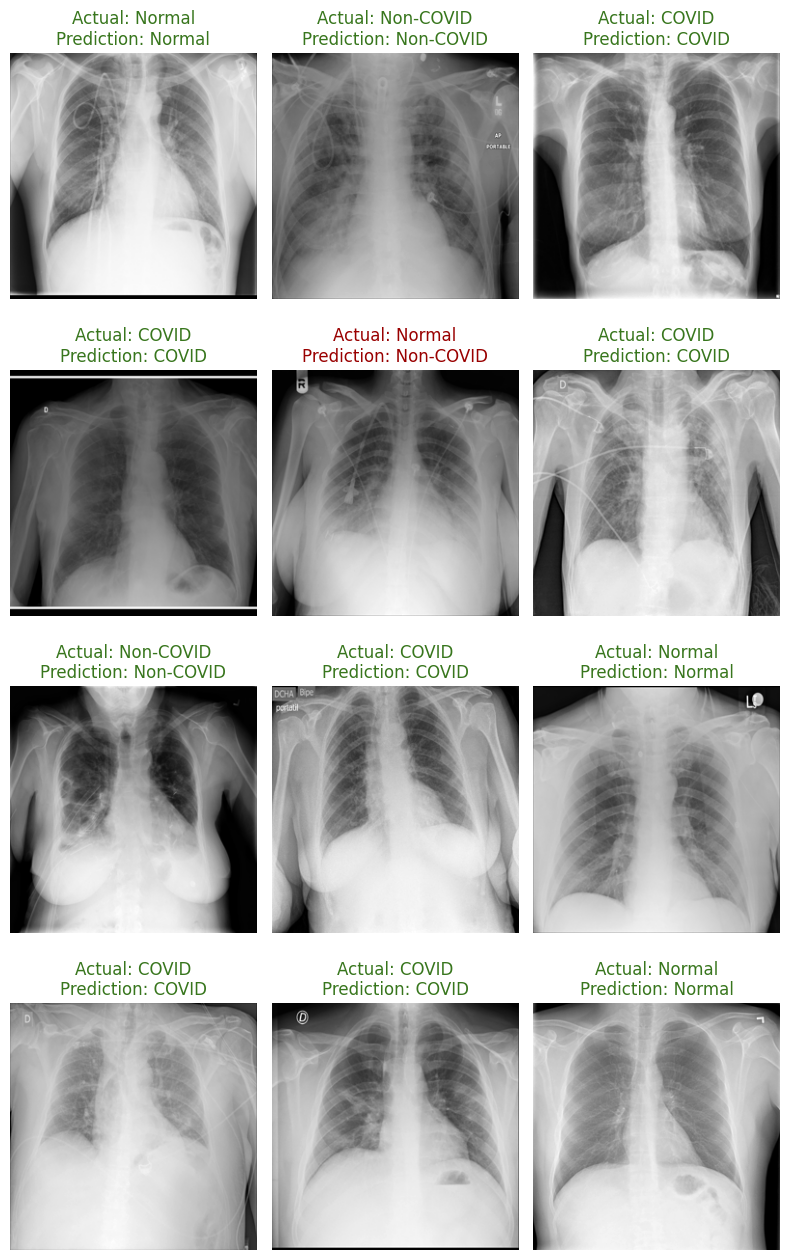

In [ ]:
''' Cell 19: Display Test Images with Predicted Labels '''

# Import necessary library
from keras.utils import array_to_img

# Set number of images to display
num_images = 12

# Generate random indices for images
indices = np.random.choice(test_images.shape[0], size=num_images, replace=False)

# Select images, corresponding labels and features based on generated indices
images_sample = test_images[indices]
labels_sample = test_labels_xgb[indices]
features_sample = test_features_xgb[indices]

# Use final hybrid model to predict class of selected images
predictions_sample_indices = final_hybrid_model.predict(features_sample)

# Convert predicted class indices to corresponding class names
predictions_sample = [class_names[i] for i in predictions_sample_indices]

# Convert true class indices to corresponding class names
labels_sample = [class_names[i] for i in labels_sample]

# Create figure to display images, and true and predicted labels
plt.figure(figsize=(8, 13))

# Loop through each image in selected sample
for i in range(num_images):

    # Create subplot for each image
    plt.subplot(int(np.ceil(num_images / 3)), 3, i + 1)

    # Display image
    plt.imshow(array_to_img(images_sample[i]))

    # Determine if prediction is correct
    is_correct = (labels_sample[i] == predictions_sample[i])

    # Assign title color based on prediction correctness
    title_color = '#38761D' if is_correct else '#990000'

    # Display true and predicted labels
    title_text = f'Actual: {labels_sample[i]}\nPrediction: {predictions_sample[i]}'
    plt.title(title_text, color=title_color)

    # Hide axis labels
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

# Display plot
plt.show()

## Grad-CAM Implementation

In [ ]:
''' Cell 20: Define Function to Generate Grad-CAM Visualization '''

# Import necessary libraries
from PIL import Image
from matplotlib import cm

# Define function to generate Grad-CAM visualization for given image and CNN model
def grad_cam(model, image, layer_name):

    # Define model that generates both final model predictions as well as output of chosen layer
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    # Incoming image is singular example so expand dimensions to represent batch of size 1
    image_tensor = np.expand_dims(image, axis=0)

    # Cast image tensor to float32 type
    inputs = tf.cast(image_tensor, tf.float32)

    # Set up gradient tape to monitor intermediate variables and predictions
    with tf.GradientTape() as tape:

        # Extract activations from chosen layer and model's final predictions
        last_conv_layer_output, preds = grad_model(inputs)

        # Identify predicted class from final predictions
        pred_class = tf.argmax(preds[0])

        # Get output of predicted class from final layer
        class_channel = preds[:, pred_class]

    # Compute gradient of output with respect to chosen layer's output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Reduce 2D gradients to 1D by averaging across height and width dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply 2D output map of chosen layer by 1D pooled gradients
    heatmap = last_conv_layer_output[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap to be between 0 and 1 for better visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    # Return Grad-CAM heatmap
    return heatmap.numpy()

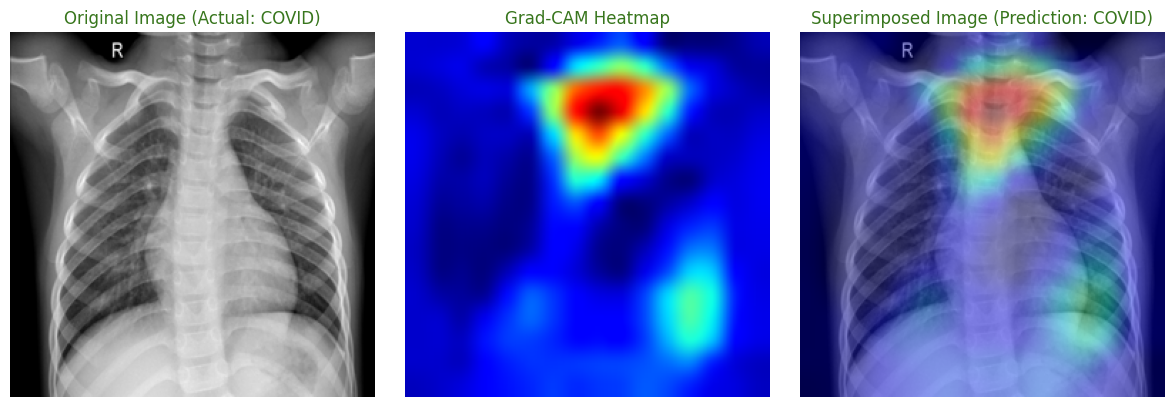

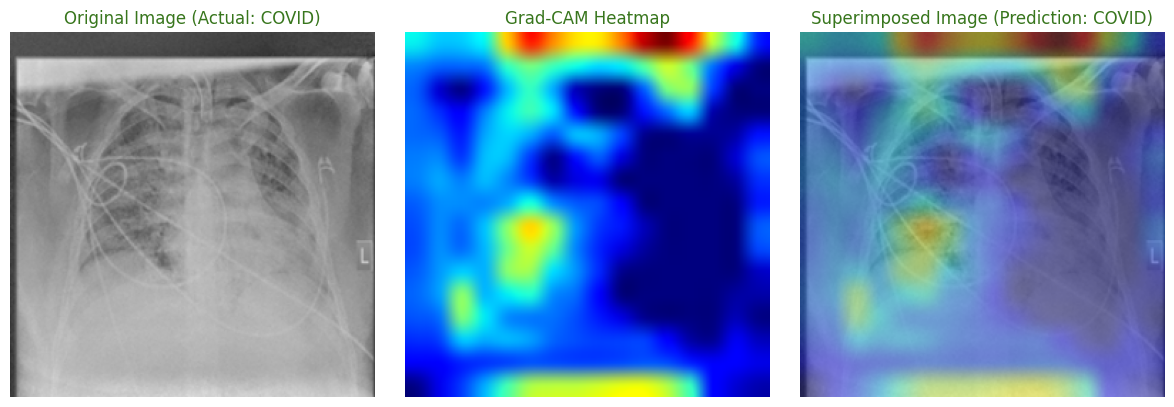

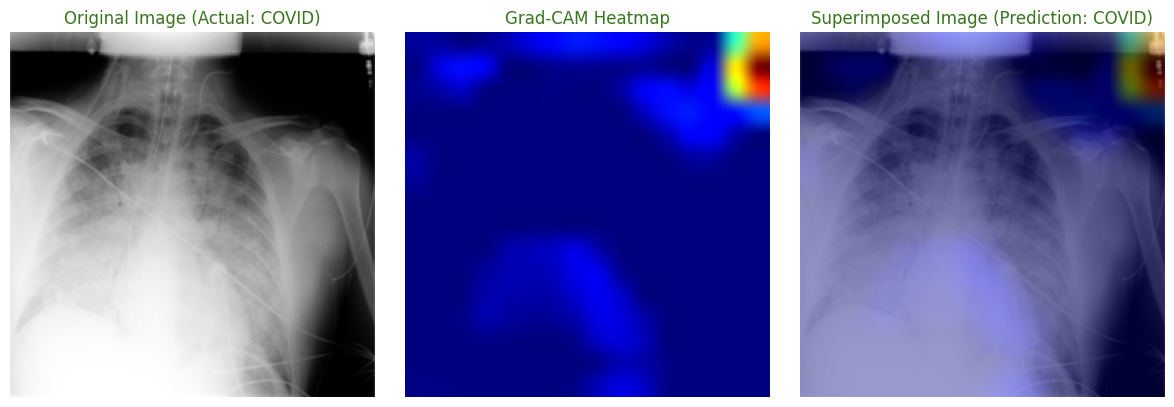

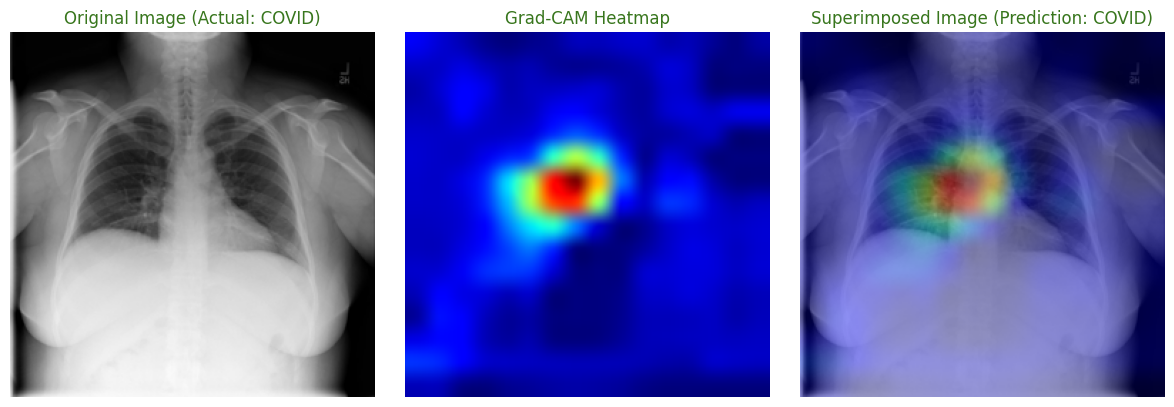

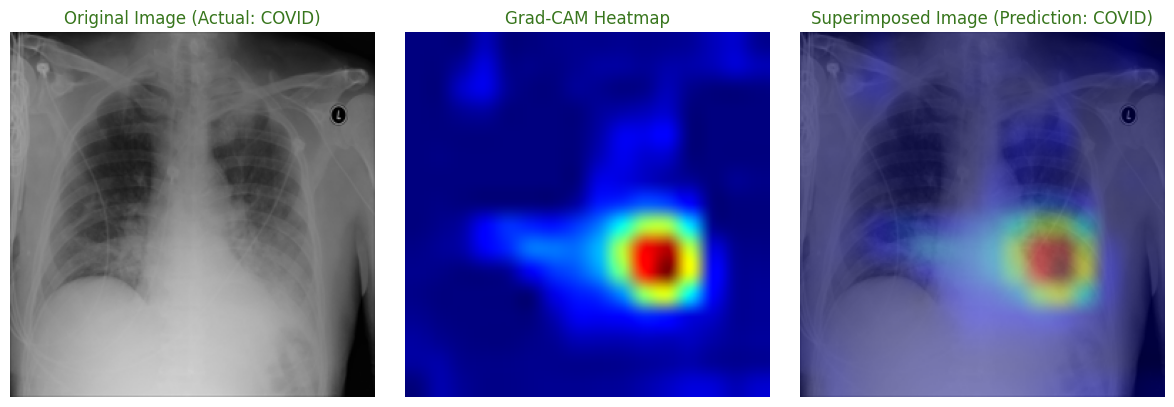

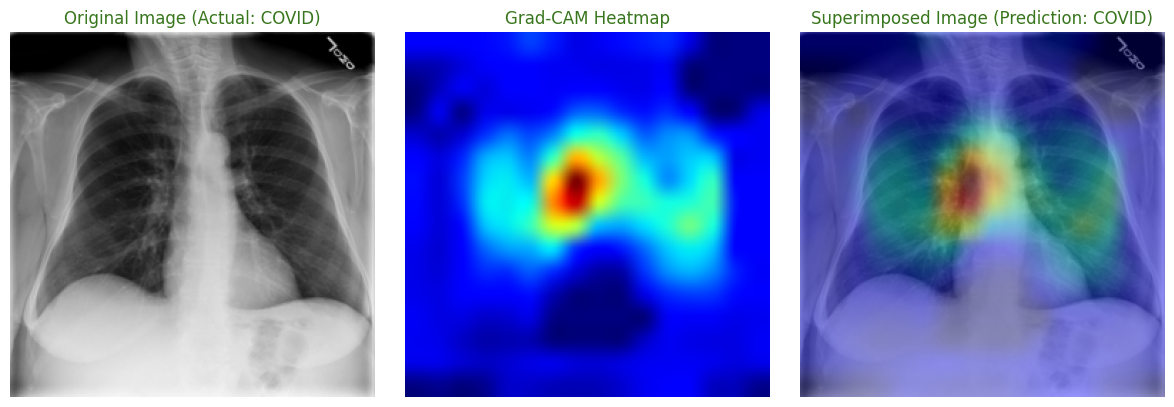

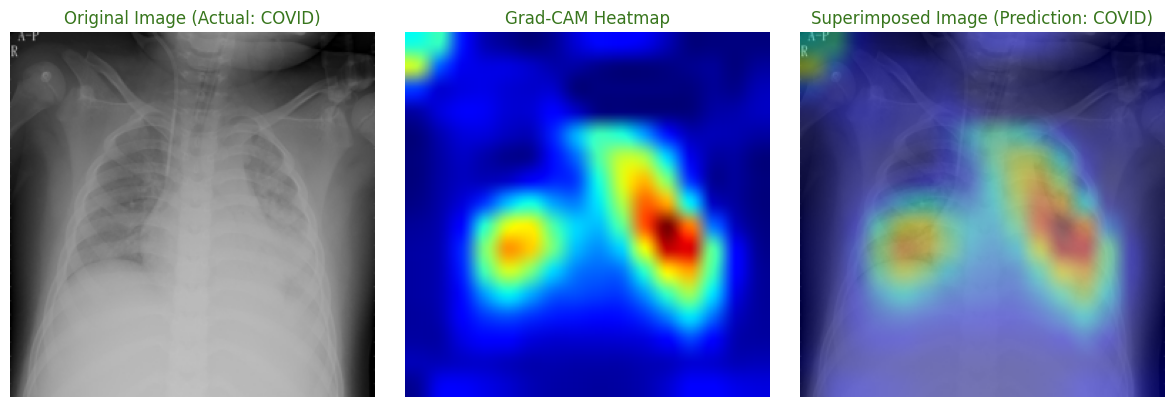

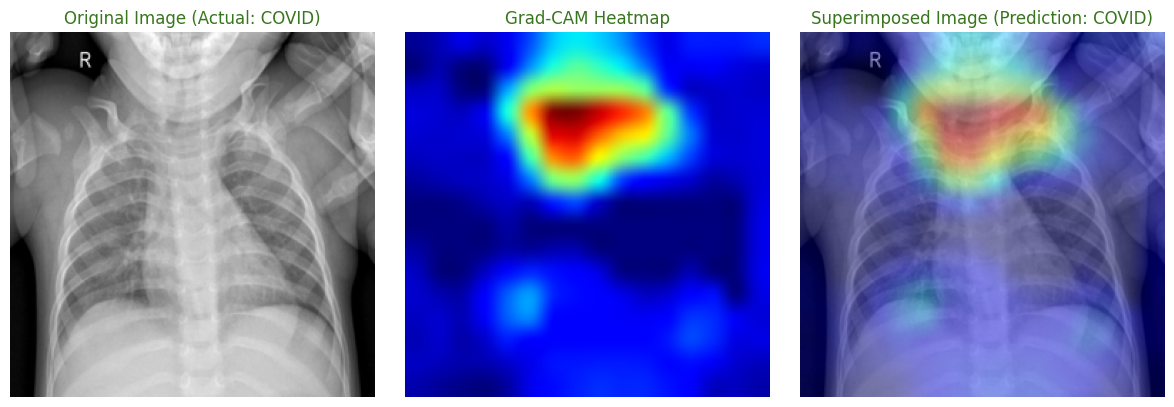

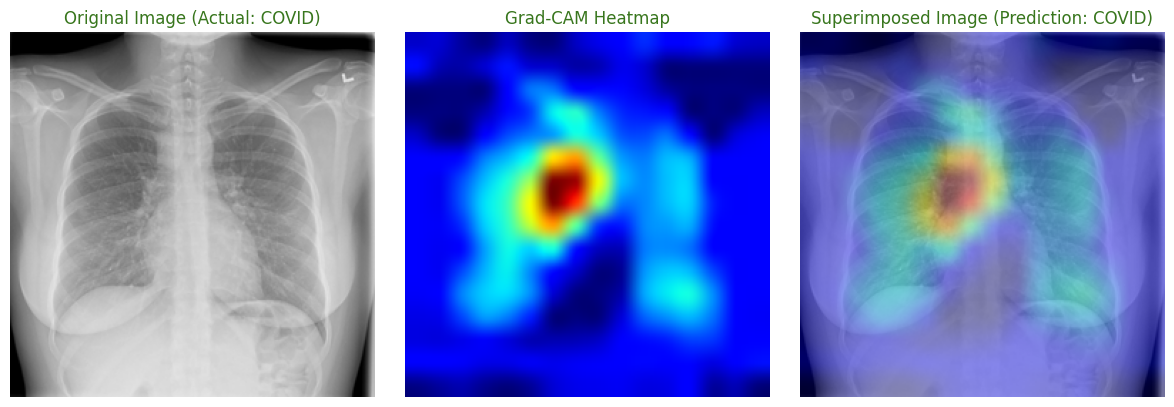

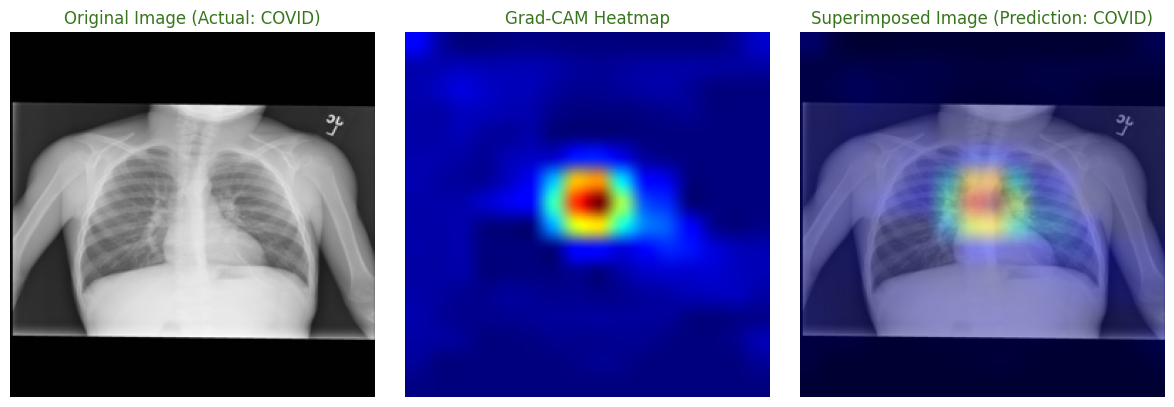

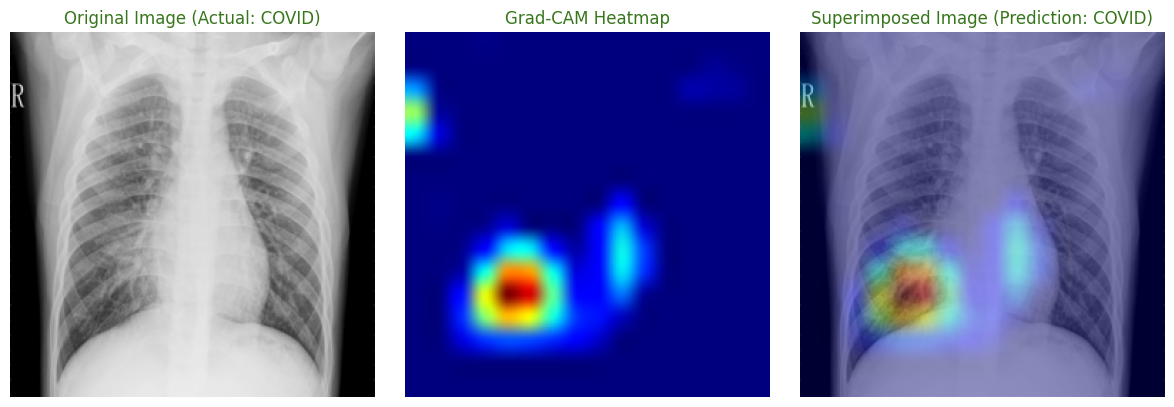

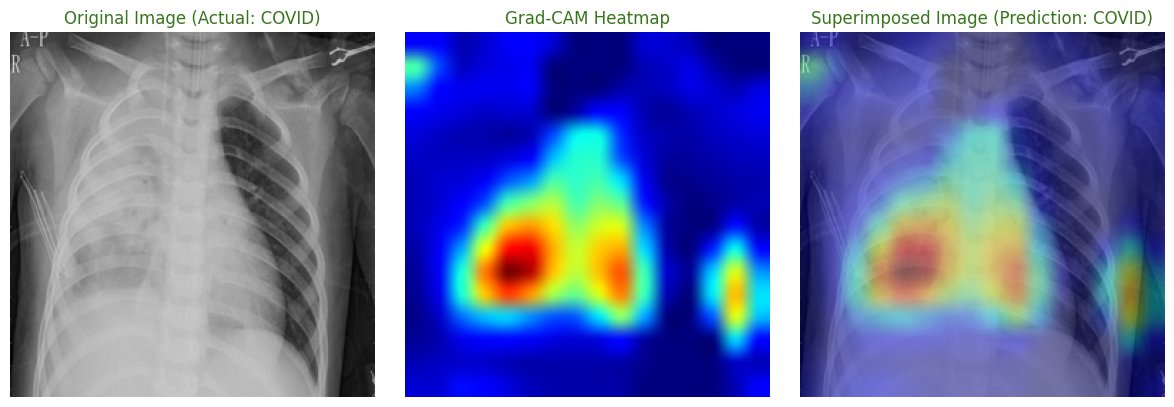

In [ ]:
''' Cell 21: Display Test Images with Grad-CAM Visualizations '''

# Set number of images to display and generate random indices
num_images = 12
image_indices = np.random.choice(len(test_images), size=num_images, replace=False)

# Set layer name based on best performing CNN model for Grad-CAM visualization
if best_cnn_model_name == 'VGG16':
    layer_name = 'block5_conv3'
elif best_cnn_model_name == 'ResNet50':
    layer_name = 'conv5_block3_3_conv'
elif best_cnn_model_name == 'InceptionV3':
    layer_name = 'mixed10'
else:
    raise Exception('Unknown CNN model name')

# Loop over random indices to generate Grad-CAM visualizations for multiple test images
for image_index in image_indices:

    # Choose test image and visualize using Grad-CAM
    image = test_images[image_index]
    grad_cam_image = grad_cam(best_cnn_model, image, layer_name)

    # Enhance heatmap image for better visualization
    grad_cam_image = np.maximum(grad_cam_image, 0)
    grad_cam_image = np.minimum(grad_cam_image, 1)
    heatmap_colored = cm.jet(grad_cam_image)[:, :, :3]
    heatmap_colored = np.uint8(255 * heatmap_colored)

    # Resize heatmap to original image size
    heatmap_resized = np.array(Image.fromarray(heatmap_colored).resize((image.shape[1], image.shape[0])))

    # Convert image and heatmap to 0-255 scale
    if image.max() <= 1:
        image = (image * 255).astype('uint8')
    if heatmap_resized.max() <= 1:
        heatmap_resized = (heatmap_resized * 255).astype('uint8')

    # Superimpose heatmap on original image, with more weight on original image
    superimposed_image = heatmap_resized * 0.4 + image * 0.6
    superimposed_image = np.clip(superimposed_image, 0, 255).astype('uint8')

    # Temporarily redirect standard output to null to suppress verbose output
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    # Predict class of image using final hybrid model
    test_feature = best_cnn_model.predict(np.expand_dims(image, axis=0))
    predicted_class = final_hybrid_model.predict(test_feature)
    predicted_class_name = class_names[np.argmax(predicted_class)]
    actual_class_name = class_names[np.argmax(test_labels_xgb[image_index])]

    # Restore standard output to original state
    sys.stdout = original_stdout

    # Determine if prediction is correct
    is_correct = (actual_class_name == predicted_class_name)

    # Assign title color based on prediction correctness
    title_color = '#38761D' if is_correct else '#990000'

    # Set up plot for original, heatmap and superimposed images
    plt.figure(figsize=(12, 4))

    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title(f'Original Image (Actual: {actual_class_name})', color=title_color)
    plt.axis('off')

    # Plot heatmap image
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized)
    plt.title('Grad-CAM Heatmap', color=title_color)
    plt.axis('off')

    # Plot superimposed image
    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_image.astype(np.uint8))
    plt.title(f'Superimposed Image (Prediction: {predicted_class_name})', color=title_color)
    plt.axis('off')

    # Adjust subplot parameters to give specified padding
    plt.tight_layout()

    # Show plot
    plt.show()

## Chest X-Ray Image Verification

In [ ]:
''' Cell 22: Download Dataset, Set Up Image Data Generators, and Generate Image Batches '''

# Define name of dataset to download
dataset_name = 'Chest-X-Ray-Verifier-Dataset'

# Define Google Drive link to download dataset
download_link = 'https://drive.google.com/uc?id=1J38IfhQYRgxQNuVDuHSegSD1MwjkK7MK'

# Define path to save downloaded zip file
zip_file_path = f'{dataset_name}.zip'

# Define paths for training, validation, and testing sets
train_dir = f'{dataset_name}/Training'
val_dir = f'{dataset_name}/Validation'
test_dir = f'{dataset_name}/Testing'

# Download dataset zip file and unzip it
os.system(f'gdown -q {download_link} -O {zip_file_path}')
os.system(f'unzip -q -n {zip_file_path}')

# Set up data augmentation techniques for training data to increase diversity of training samples and improve model robustness
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # Apply preprocessing function to every image
    rotation_range=10,  # Rotate images up to 10 degrees randomly
    width_shift_range=0.05,  # Shift images horizontally by up to 5% of width randomly
    height_shift_range=0.05,  # Shift images vertically by up to 5% of height randomly
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly change brightness
    zoom_range=[0.8, 1.2]  # Randomly zoom in on images
)

# Create ImageDataGenerator instances for training, validation, and testing sets
train_datagen = data_generator

# Do not apply augmentation to validation and testing sets, only preprocessing
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

# Set batch size for data generators
batch_size = 32

# Temporarily redirect standard output to null to suppress verbose output
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Generate batches of tensor image data with real-time data augmentation for training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

# Generate batches of tensor image data with real-time data augmentation for validation set
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

# Generate batches of tensor image data with real-time data augmentation for testing set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Restore standard output to original state
sys.stdout = original_stdout

In [ ]:
''' Cell 23: Compile, Train, and Evaluate Chest X-Ray Image Verifier Model '''

# Import necessary library
from keras import layers

# Temporarily redirect standard output to null to suppress verbose output
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Load VGG16 with pre-trained weights from ImageNet without top fully-connected layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Restore standard output to original state
sys.stdout = original_stdout

# Freeze layers of base CNN model
for layer in vgg16.layers:
    layer.trainable = False

# Create new CNN model
x = layers.Flatten()(vgg16.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)
verifier_model = Model(inputs=vgg16.input, outputs=predictions)

# Compile CNN model
verifier_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit CNN model to data
verifier_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=0
)

# Display accuracy of chest X-ray image verifier model
loss, accuracy = verifier_model.evaluate(test_generator)
print('\n\033[1m\033[36m' + f'Accuracy of VGG16 Chest X-Ray Image Verifier Model on Testing Set: {accuracy * 100:.2f}%' + '\033[0m\n')


Accuracy of VGG16 Chest X-Ray Image Verifier Model on Testing Set: 99.80%



In [ ]:
''' Cell 24: Save and Download Chest X-Ray Image Verifier Model '''

# Save chest X-ray image verifier model in H5 format
verifier_model.save('VGG16-Chest-X-Ray-Verifier-Model.h5')

# Download saved chest X-ray image verifier model from Google Colab to local system
files.download('VGG16-Chest-X-Ray-Verifier-Model.h5')

<sub>**Disclaimer:** The models and tools used and built in this notebook are intended for research purposes only. They are not intended to be used for medical diagnosis or treatment. Always seek the advice of a qualified healthcare provider with any questions regarding a medical condition or treatment.</sub>

**Abhijeet Pitumbur © 2023**